In [1]:
import os
os.chdir("../..")
import pbparam
import pandas as pd

In [2]:
anode_half_lit = pd.read_csv(os.path.join("data", "anode_OCP_2_lit.csv"))
anode_half_delit = pd.read_csv(os.path.join("data", "anode_OCP_2_delit.csv"))
anode_three_lit = pd.read_csv(os.path.join("data", "anode_OCP_3_lit.csv"))
anode_three_delit = pd.read_csv(os.path.join("data", "anode_OCP_3_delit.csv"))

In [3]:
ocp_balance = pbparam.OCPBalance(
    [anode_three_lit, anode_three_delit], [anode_half_lit, anode_half_delit]
)
optimiser = pbparam.ScipyMinimize(
    method="Nelder-Mead", solver_options={"xatol": 1e-12, "fatol": 1e-12}
)

In [4]:
result = optimiser.optimise(ocp_balance)
print(result.x, result.fun)

<bound method OCPBalance.objective_function of <pbparam.optimisation_problems.OCP_balance.OCPBalance object at 0x7f3198674670>>
[5.111434746297965e-09, 0.20356480239731106]
[(5.622578220927762e-09, 1.1), (-0.1, 0.22392128263704217)]


/home/brosaplanella/pybamm-param/pbparam/optimisers/scipy_minimize.py:36: OptimizeWarning: Initial guess is not within the specified bounds
  raw_result = minimize(


[3.22625625e-08 2.08435249e-01] 0.44240466307027293


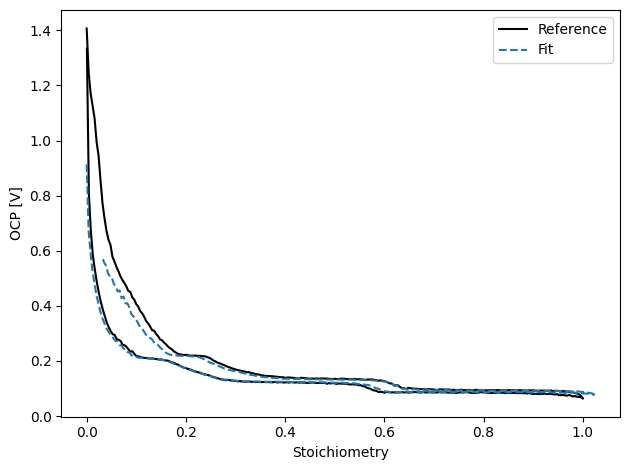

In [6]:
result.plot();